In [4]:
# Hyperparameter tunning results
import json

# Read the file as raw lines and group into complete JSON objects
json_objects = []
buffer = ""
with open("hyperparameter_tuning_results.json", "r") as f:
    for line in f:
        buffer += line.strip()
        if line.strip().endswith("}"):
            try:
                json_objects.append(json.loads(buffer))
                buffer = ""
            except json.JSONDecodeError:
                buffer += " "  # continue accumulating if it's incomplete

json_objects_filtered = []
valid_prefixes = [
    "ghidorah1_[757216464]",
    "ghidorah2_[757216464]",
    "ghidorah3_[757216464]",
    "QiXin4080Super_[757216464]",
]
for json_obj in json_objects:
    if any(json_obj["model_id"].startswith(prefix) for prefix in valid_prefixes):
        json_objects_filtered.append(json_obj)

# Sort by test loss
sorted_results = sorted(json_objects_filtered, key=lambda x: x["best_test_loss"])

print(f"Total number of hp settings: {len(json_objects_filtered)}")

# Show top 5
for rank, res in enumerate(sorted_results[:5], 1):
    print(f"\n=== Rank {rank} ===")
    print(f"Model ID: {res['model_id']}")
    print(f"Test Loss: {res['best_test_loss']:.6f}")
    print("Top Params:")
    # for k, v in res["params"].items():
    #     print(f"  {k}: {v}")



Total number of hp settings: 77

=== Rank 1 ===
Model ID: ghidorah3_[757216464]_20250505_094826
Test Loss: 0.055557
Top Params:

=== Rank 2 ===
Model ID: QiXin4080Super_[757216464]_20250504_091453
Test Loss: 0.055869
Top Params:

=== Rank 3 ===
Model ID: ghidorah3_[757216464]_20250505_013054
Test Loss: 0.056158
Top Params:

=== Rank 4 ===
Model ID: ghidorah2_[757216464]_20250505_060912
Test Loss: 0.056262
Top Params:

=== Rank 5 ===
Model ID: ghidorah3_[757216464]_20250504_224916
Test Loss: 0.056371
Top Params:


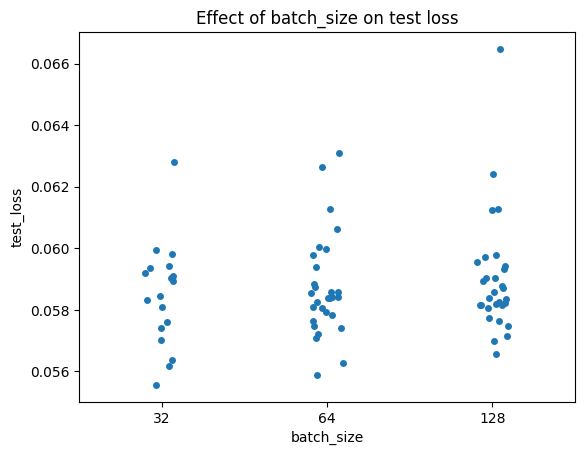

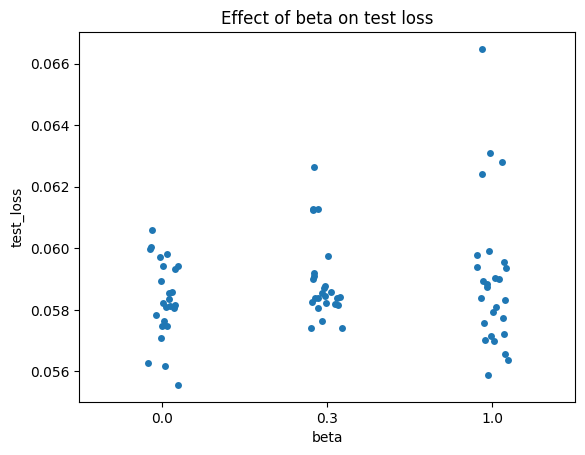

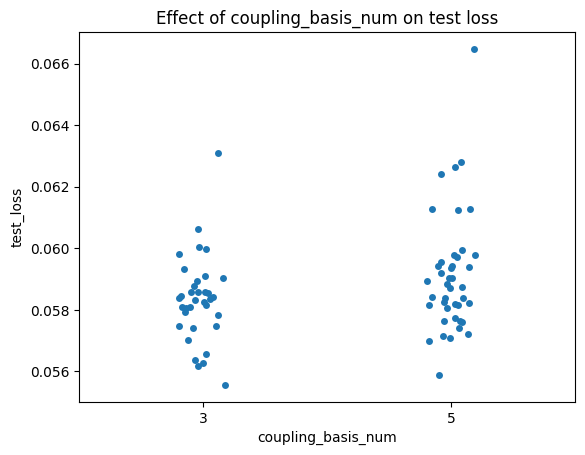

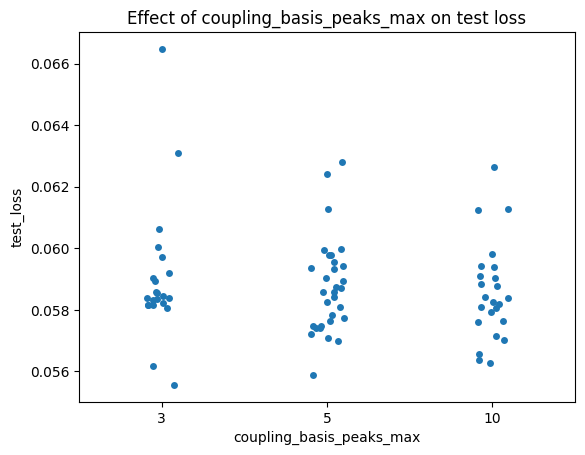

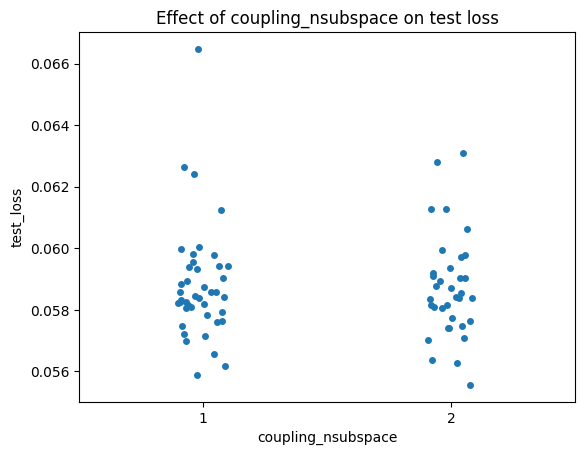

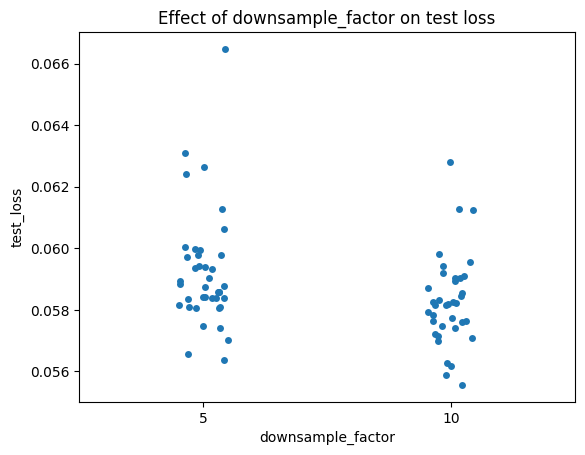

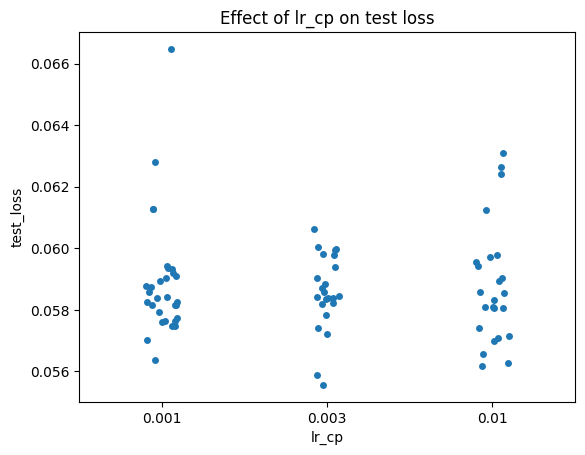

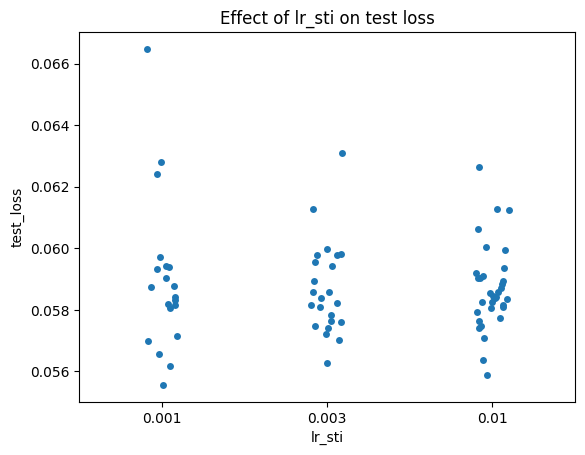

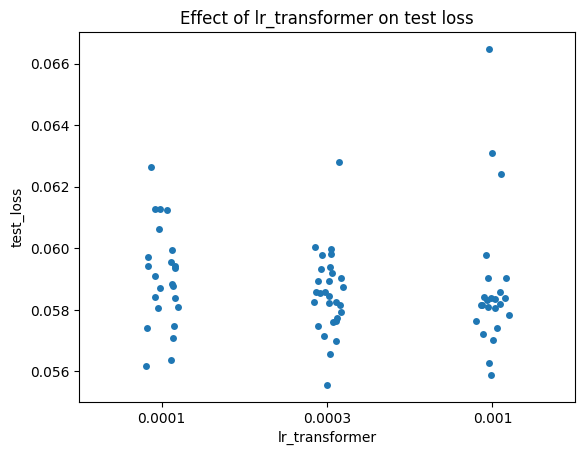

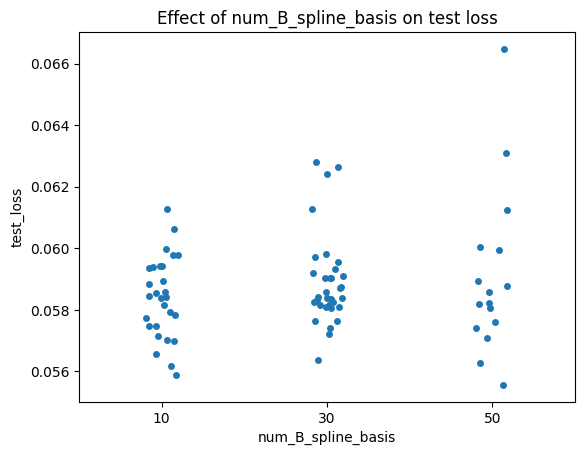

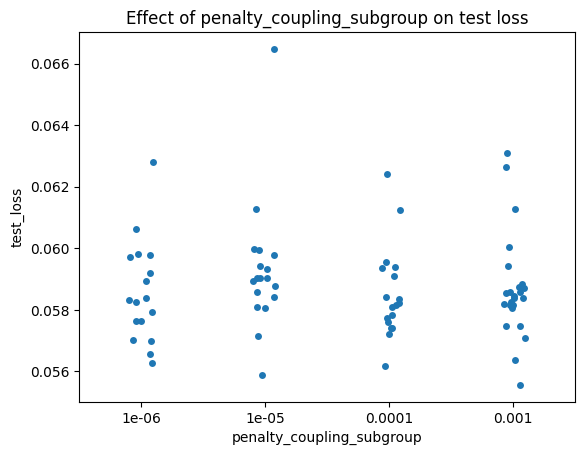

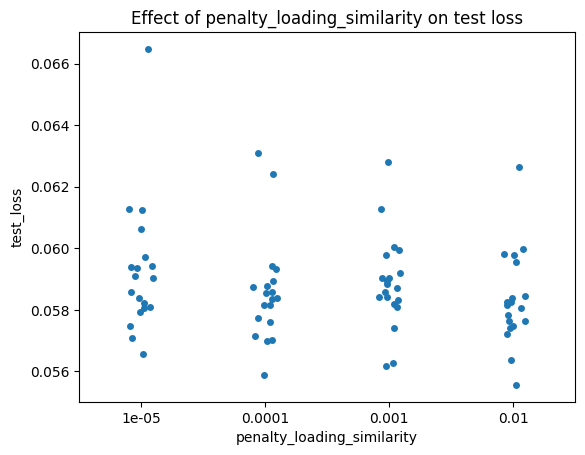

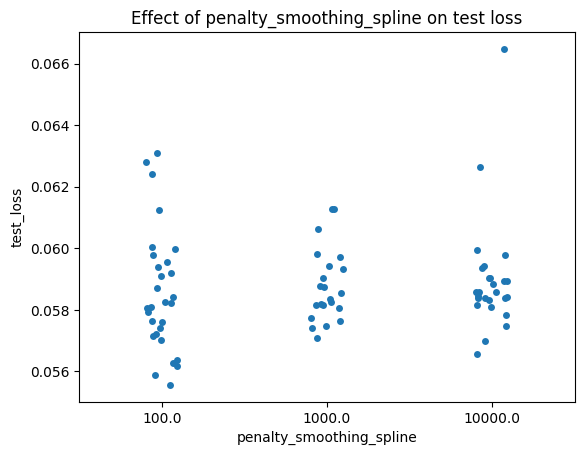

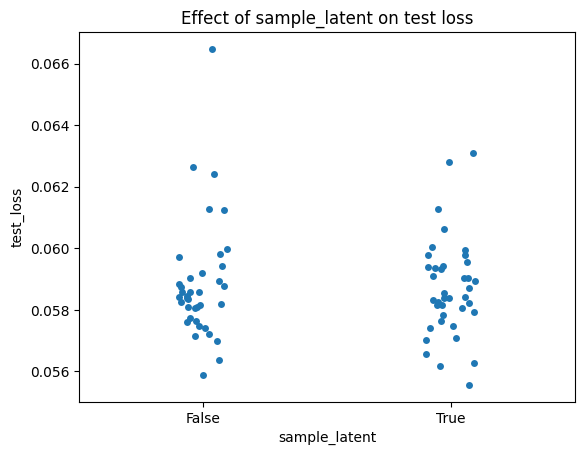

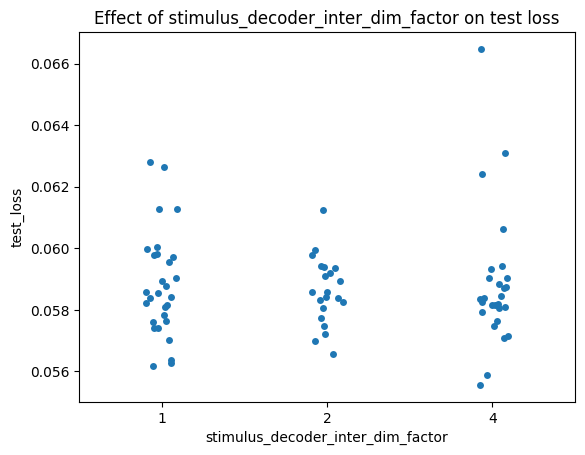

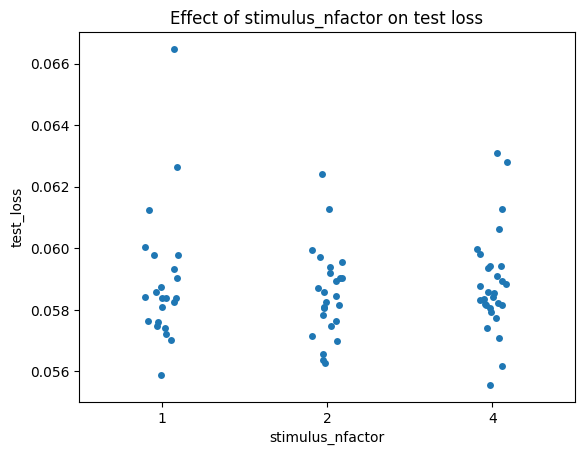

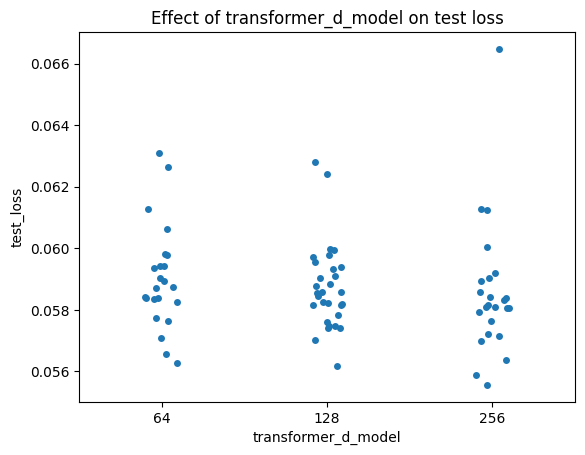

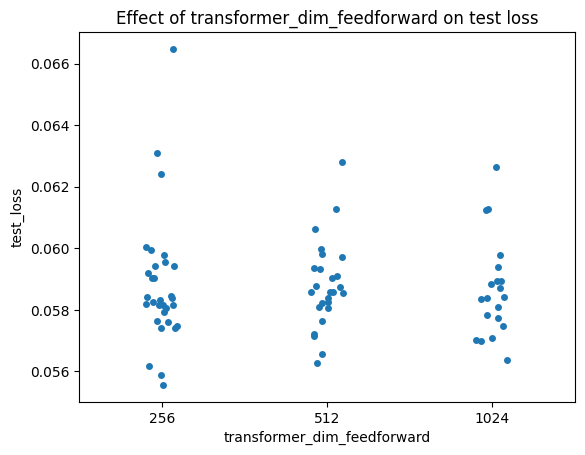

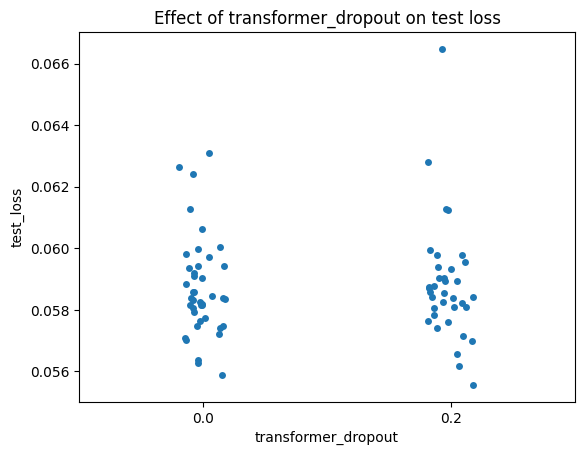

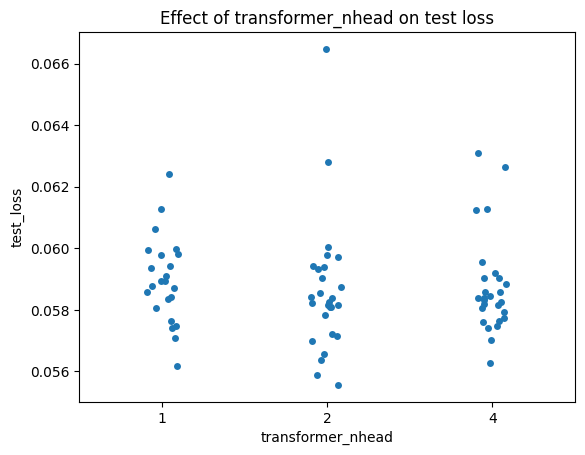

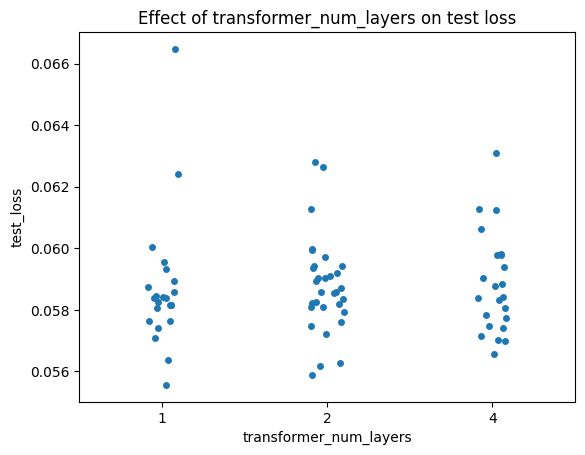

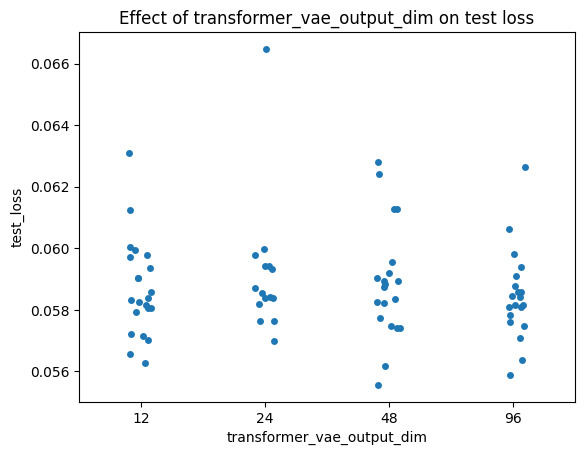

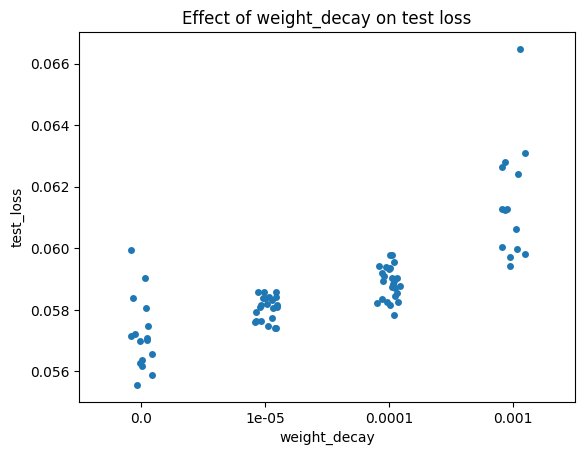

In [6]:
import pandas as pd
from scipy.stats import spearmanr

# Convert to DataFrame
df = pd.DataFrame([{
    **entry["params"],
    "test_loss": entry["best_test_loss"]
} for entry in json_objects_filtered])

import matplotlib.pyplot as plt
import seaborn as sns

for col in df.columns:
    if col == "test_loss" or df[col].nunique() <= 1:
        continue
    plt.figure()
    sns.stripplot(x=col, y="test_loss", data=df, jitter=True, size=5)
    plt.title(f"Effect of {col} on test loss")
    plt.show()
